## Name: Michael Osei
***
### Question 3

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

iris_data = load_iris()

X = np.expand_dims(iris_data.data[:,2], axis=1)
y = iris_data.data[:,3]

Xtrain, Xtest, yTrain, yTest = train_test_split(
                    X, y, random_state=0, train_size=0.8,
                    test_size=0.2)

#### Ordinary Least Squares Regresssion

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(Xtrain, yTrain)
trsc = lr.score(Xtrain, yTrain)
tesc = lr.score(Xtest, yTest)
print("Score  (training): {:0.2f}%".format(trsc * 100))
print("Score  (testing): {:0.2f}%".format(tesc * 100))

Score  (training): 93.73%
Score  (testing): 87.06%


#### Ridge Regression 

In [21]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10).fit(Xtrain, yTrain)
trsc = rr.score(Xtrain, yTrain)
tesc = rr.score(Xtest, yTest)
print("Score  (training): {:0.2f}%".format(trsc * 100))
print("Score  (testing): {:0.2f}%".format(tesc * 100))

Score  (training): 93.67%
Score  (testing): 87.31%


#### Lasso Regression

In [24]:
from sklearn.linear_model import Lasso
llr = Lasso(alpha=0.1, max_iter=100000).fit(Xtrain, yTrain)
trsc = llr.score(Xtrain, yTrain)
tesc = llr.score(Xtest, yTest)
print("Score  (training): {:0.2f}%".format(trsc * 100))
print("Score  (testing): {:0.2f}%".format(tesc * 100))
print("# of features used: {}".format(np.sum(llr.coef_ != 0)))

Score  (training): 93.20%
Score  (testing): 87.41%
# of features used: 1


### Question 4

In [34]:
X = iris_data.data[:100]
Y = iris_data.target[:100]

Xtrain, Xtest, yTrain, yTest = train_test_split(
                    X, Y, random_state=4, train_size=0.8,
                    test_size=0.2)

In [35]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression().fit(Xtrain, yTrain)
trsc = logr.score(Xtrain, yTrain)
tesc = logr.score(Xtest, yTest)
print("Score  (training): {:0.2f}%".format(trsc * 100))
print("Score  (testing): {:0.2f}%".format(tesc * 100))

Score  (training): 100.00%
Score  (testing): 100.00%


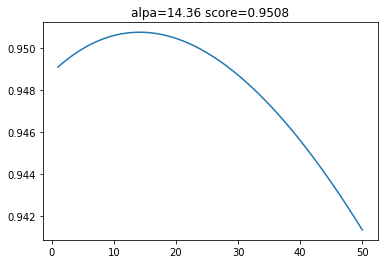

In [42]:
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
%matplotlib inline

X = np.expand_dims(iris_data.data[:,2], axis=1)
Y = iris_data.data[:,3]

Xtrain, Xtest, yTrain, yTest = train_test_split(
                    X, Y, random_state=4, train_size=0.8,
                    test_size=0.2)
xAxis = np.linspace(1,50, 100)
scores = []
maxSc = 0
maxA = 0
for i in xAxis:
    ridge = Ridge(alpha=i).fit(Xtrain, yTrain)
    sc= ridge.score(Xtest, yTest)
    scores.append(sc)
    if sc > maxSc:
        maxSc = sc
        maxA = i
plt.title("alpa={:0.2f} score={:0.4}".format(maxA, maxSc))
plt.plot(xAxis, scores)
